<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd


In [14]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

#[Problem 1] Determine the initial value of the center point

In [10]:
n_clusters=8
initial = np.random.permutation(X.shape[0])[:n_clusters]
cluster_centers_ = X[initial]
cluster_centers_

array([[-1.2386086 ,  2.81373288],
       [-0.59312453,  3.37090459],
       [ 2.28809874,  0.12954182],
       [ 1.46870582,  1.86947425],
       [-2.27253281,  3.13757811],
       [-1.98331513,  3.47639041],
       [-1.33869125,  2.36818187],
       [ 1.4726926 ,  1.3480769 ]])

#[Problem 2] Creation of a function to obtain SSE

In [11]:
def _distance(a, b):
    return np.sqrt(((a - b)**2).sum())

#Repeat cluster allocation and center point movement

#[Problem 3] Allocation to cluster

In [12]:
def _nearest(clusters, x):
    return np.argmin([_distance(x, c) for c in clusters])
max_iter=200
for _ in range(max_iter):
    labels_ = [_nearest(cluster_centers_, x) for x in X]
    indices = [[i for i, l in enumerate(labels_) if l == j]
                for j in range(n_clusters)]
    X_by_cluster = [X[i] for i in indices]
    # update the clusters
    cluster_centers_ = [c.sum(axis=0) / len(c) for c in X_by_cluster]
cluster_centers_

[array([-1.11459644,  3.48370066]),
 array([0.83686801, 4.55061402]),
 array([2.31910566, 0.46821372]),
 array([1.15442677, 3.74398509]),
 array([-1.9453357,  3.1218215]),
 array([-1.26811733,  7.76378266]),
 array([-1.24986581,  2.55961718]),
 array([1.80779843, 1.24539652])]

In [ ]:
def eucledian_distance(x1,x2):
  distance = np.sqrt(np.sum((x1-x2)**2))
  return np.sqrt(np.sum((x1-x2)**2))

#[Problème 4] Mouvement du point central
#Estimation
#Prediction

In [13]:
inertia_ = sum(((cluster_centers_[l] - x)**2).sum()
                            for x, l in zip(X, labels_))

In [28]:
class ScratchKMeans():
    def __init__(self, n_clusters,max_iter,n_init=10,tol=0.2,random_state=None,verbose=False):
        """
        K-means scratch implementation

        Parameters
        ----------
        n_clusters : int
          Number of clusters
        n_init : int
          How many times to change the initial value of the center point for calculation
        max_iter : int
          Maximum number of iterations in one calculation
        tol : float
          Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
        verbose : bool
          True to output the learning process
        """


        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
      

    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]

        for _ in range(self.max_iter):
            self.labels_ = [self._nearest(self.cluster_centers_, x) for x in X]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            # update the clusters
            self.cluster_centers_ = [c.sum(axis=0) / len(c) for c in X_by_cluster]

        return self

    def _nearest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    def _distance(self, a, b):
        return np.sqrt(((a - b)**2).sum())

    def predict(self, X):
        return self.labels_

    def transform(self, X):
        return [[self._distance(x, c) for c in self.cluster_centers_] for x in X]

    def fit_predict(self, X):
        return self.fit(X).predict(X)

    def fit_transform(self, X):
        return self.fit(X).transform(X)


In [20]:
mld = ScratchKMeans(n_clusters=5, max_iter=300)
model = mld.fit(X)
y_pred=model.predict(X)

In [22]:
print(y_pred)

[1, 4, 1, 1, 1, 1, 3, 0, 1, 4, 4, 4, 4, 0, 4, 2, 2, 3, 3, 2, 1, 4, 3, 2, 1, 3, 3, 1, 2, 2, 2, 4, 2, 2, 3, 1, 0, 2, 0, 3, 1, 3, 4, 3, 3, 0, 2, 3, 1, 1, 1, 2, 3, 3, 3, 4, 0, 2, 2, 0, 4, 2, 2, 1, 2, 0, 3, 3, 2, 1, 0, 2, 1, 4, 1, 1, 3, 3, 2, 2, 2, 0, 3, 1, 2, 3, 2, 2, 1, 1, 1, 3, 1, 3, 3, 4, 4, 3, 0, 1]


#[Problème 8] Mise en œuvre de la méthode du coude

In [2]:
class ScratchKMeansC():
    def __init__(self, n_clusters,max_iter,n_init=10,tol=0.2,random_state=None,verbose=False):
        """
        K-means scratch implementation

        Parameters
        ----------
        n_clusters : int
          Number of clusters
        n_init : int
          How many times to change the initial value of the center point for calculation
        max_iter : int
          Maximum number of iterations in one calculation
        tol : float
          Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
        verbose : bool
          True to output the learning process
        """


        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.SSE=[]

    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]

       
        for _ in range(self.max_iter):
            self.labels_ = [self._nearest(self.cluster_centers_, x) for x in X]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            # update the clusters
            self.cluster_centers_ = [c.sum(axis=0) / len(c) for c in X_by_cluster]
            
            # sum of square distances from the closest cluster
            self.inertia_ = sum(((self.cluster_centers_[l] - x)**2).sum()
                                for x, l in zip(X, self.labels_))
            self.SSE.append(self.inertia_)
        return self

    def _nearest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    def _distance(self, a, b):
        return np.sqrt(((a - b)**2).sum())

    def predict(self, X):
        return self.labels_

    def transform(self, X):
        return [[self._distance(x, c) for c in self.cluster_centers_] for x in X]

    def fit_predict(self, X):
        return self.fit(X).predict(X)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def score(self, X):
        return -self.inertia_

In [31]:
mld = ScratchKMeans(n_clusters=5, max_iter=300)
model = mld.fit(X)
y_pred=model.predict(X)
print(model.SSE)

[277.32211177677146, 46.24900388359506, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.39904506050976, 43.3990450

#[Problem 9] (Advance assignment) Silhouette diagram

In [4]:
from sklearn.decomposition import PCA
data=pd.read_csv("Wholesale customers data.csv")
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


[0.45961362 0.86478588 0.93481596 0.97883941 0.99386152 1.
 1.         1.        ]


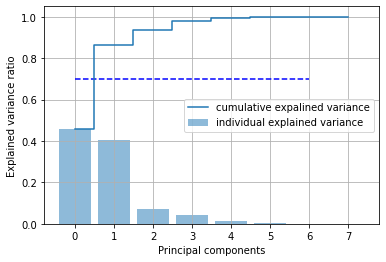

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
a=[]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(0,8),var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,8), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

#[Problem 10] Selection of the number of clusters k

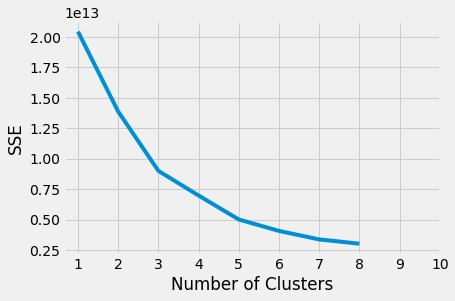

In [73]:
SSE = []
for k in range(1, 9):
  model = ScratchKMeansC(n_clusters=k, max_iter=150, verbose=True)
  y_pred3 = model.fit_predict(data_pca)
  SSE.append(sum(model.SSE))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 9), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [10]:
SSE = []
model = ScratchKMeansC(n_clusters=7, max_iter=150, verbose=True)
y_pred3 = model.fit_predict(data_pca)
SSE.append(sum(model.SSE))

As the number of clusters k increases, inertia decreases. Eventually, when k = sample size, inertia is 0 because every cluster center is the sample itself. That does not mean we should just increase k though!

#[Problem 11] Comparison with known groups

In [15]:
# add clusters to the dataset
data['clusters'] = y_pred3[:]
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,4


In [16]:
data.groupby(['Channel','Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
Channel Region                                                               
1       1          59    59       59      59                59          59   
        2          28    28       28      28                28          28   
        3         211   211      211     211               211         211   
2       1          18    18       18      18                18          18   
        2          19    19       19      19                19          19   
        3         105   105      105     105               105         105   

                clusters  
Channel Region            
1       1             59  
        2             28  
        3            211  
2       1             18  
        2             19  
        3            105

Region and Channel were not used for K-means, but they are known groups

#[Problem 12] Useful information for wholesalers

In [20]:
data.groupby(['clusters']).count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
clusters,,,,,,,,
0,48,48,48,48,48,48,48,48
1,30,30,30,30,30,30,30,30
2,153,153,153,153,153,153,153,153
3,86,86,86,86,86,86,86,86
4,110,110,110,110,110,110,110,110
5,8,8,8,8,8,8,8,8
6,5,5,5,5,5,5,5,5


#Problem 13] (Advance assignment) Investigation of other methods

##Advantages and disadvantages of DBSCAN
###Advantages
DBSCAN does not require one to specify the number of clusters in the data a priori, as opposed to k-means. DBSCAN can find arbitrarily-shaped clusters. It can even find a cluster completely surrounded by (but not connected to) a different cluster.

This is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density.

###Disadvantages
DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-ε combination cannot then be chosen appropriately for all clusters.

The quality of DBSCAN depends on the distance measure used in the function regionQuery(P,ε). The most common distance metric used is Euclidean distance. Especially for high-dimensional data, this metric can be rendered almost useless due to the so-called "Curse of dimensionality", making it difficult to find an appropriate value for ε. This effect, however, is also present in any other algorithm based on Euclidean distance.



##Advantages and disadvantages of t-SNE and LLE
###Advantages (t-SNE)
 Preserves Local and Global Structure, Handles Non Linear Data Efficiently
###Advantages LLE

Effective at high concentration of substrate in the extractive fermentation, The acid can be reextracted and the solvent can be reused, Better control of pH in the bioreactor,Better recovery of acid with higher product purity


###Disadvantages of t-SNE
 Computationally Complex, Non-deterministic, Requires Hyperparameter Tuning, Noisy Patterns:
###Disadvantages of LLE
Multiplication of extraction steps to obtain optimum output.
Use of large volumes of organic solvents, which the costs of recycling are becoming increasingly more expensive.
Emulsion's difficulties which hinders the full recovery of the extract



#[Problem 14] (Advance assignment) Use of t-SNE and DBSCAN

In [15]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)

In [16]:
X_embedded

array([[ 1.1120902e+00, -1.5363446e-01],
       [-8.6871662e+00, -6.5161753e-01],
       [ 7.2213322e-01,  6.3164818e-01],
       [ 4.8962331e-01,  3.6981615e-01],
       [ 3.3990499e-01,  8.3045888e-01],
       [ 7.9494780e-01, -5.7779658e-03],
       [ 8.7496299e-01, -3.8692977e+00],
       [-8.3317137e+00, -1.3769183e+00],
       [-1.9469383e-01, -2.3617810e-01],
       [-8.4052639e+00, -8.4756070e-01],
       [-7.8492250e+00, -1.0341289e+00],
       [-8.0793104e+00, -5.4780740e-01],
       [-8.0159903e+00, -8.8019764e-01],
       [-8.2597895e+00, -1.2416425e+00],
       [-8.0820618e+00, -1.2613225e+00],
       [ 6.4530501e+00,  5.1914358e+00],
       [ 5.7837090e+00,  3.8785276e+00],
       [ 1.2515051e+00, -2.1490338e+00],
       [ 1.5812701e+00, -3.9257543e+00],
       [ 6.5052128e+00,  5.0352449e+00],
       [ 1.2877350e+00,  1.0712248e+00],
       [-8.4319448e+00, -5.7690185e-01],
       [ 1.3506547e+00, -3.9306428e+00],
       [ 6.6910276e+00,  4.8849955e+00],
       [ 3.78391

In [17]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2)
clustering.fit_predict(X_embedded)


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])